# Sentiment Analysis using Twitter data - 
Pandemic had augmented angst among Indian SubContinent about the chinese products. The tweets were raging in on the platform and coming to a conclusion with different opinions was only becoming difficult. During this time, "make in india" movement was super popular as well. Thus, I wanted to analyze the sentiments of the people related to boycotting chinese market products and research on how it effected the Indian Market in return.

The idea behind the project was not only to develop a model to analyze the twitter sentiments but also to learn to implement different ML Algorithms and differentiate between their performance metrices.

In [1]:
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd

## Data Extraction

#### Connect to Twitter API

#### Load and show data

In [2]:
#Load tweets from csv file
data = pd.read_csv('tweets1.csv')

#Show loaded tweets
data

,Tweets
0,We have 35% of total production for exports h...
1,WuhanVirus\n\nChina must pay.\n\nBanChina
2,_pang he is a fucking joke!\nHKIndependence f...
3,BanChina - All the MI phones &amp; One plus ph...
4,“China is the enemy of privacy. China shows wh...
...,...
11727,"tiktokban\nI was literally saying 2mo ago "" ti..."
11728,Trump's desire to eliminate TikTok is not rela...
11729,"So, as per CCPChina, whole world is miscalcula..."
11730,Happy women's month to every woman out there r...


## Data Pre-processing

In [3]:
import re

# Create a function to clean the tweets
def cleanTxt(text):
     #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis
    text = re.sub('[^a-zA-Z#]', ' ', text) #Removing Punctuation, Numbers, and Special Characters
    
    return text

# Clean the tweets
data['Tweets'] = data['Tweets'].apply(cleanTxt)

# Remove stop words
data['Tweets'] = data['Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Show the cleaned tweets
data

,Tweets
0,have total production exports hence scare shor...
1,WuhanVirus China must BanChina
2,pang fucking joke HKIndependence freehk banchi...
3,BanChina phones plus phones sold minutes when ...
4,China enemy privacy China shows what totalitar...
...,...
11727,tiktokban literally saying tiktok good live re...
11728,Trump desire eliminate TikTok related China Ti...
11729,CCPChina whole world miscalculating their resp...
11730,Happy women month every woman there regardless...


In [4]:
data.to_csv('data.csv')

## Feature Extraction

In [4]:
from textblob import TextBlob

# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
data['Subjectivity'] = data['Tweets'].apply(getSubjectivity)
data['Polarity'] = data['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
data

,Tweets,Subjectivity,Polarity
0,have total production exports hence scare shor...,0.425000,0.000000
1,WuhanVirus China must BanChina,0.000000,0.000000
2,pang fucking joke HKIndependence freehk banchi...,0.800000,-0.600000
3,BanChina phones plus phones sold minutes when ...,0.000000,0.000000
4,China enemy privacy China shows what totalitar...,0.000000,0.000000
...,...,...,...
11727,tiktokban literally saying tiktok good live re...,0.466667,0.345455
11728,Trump desire eliminate TikTok related China Ti...,0.700000,0.150000
11729,CCPChina whole world miscalculating their resp...,0.613333,-0.093333
11730,Happy women month every woman there regardless...,0.800000,0.650000


## Visualization

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

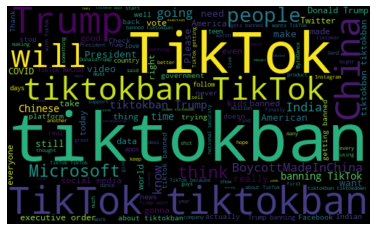

In [6]:
from wordcloud import WordCloud

# word cloud visualization
allWords = ' '.join([twts for twts in data['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Scatter Plot Polarity vs Subjectivity

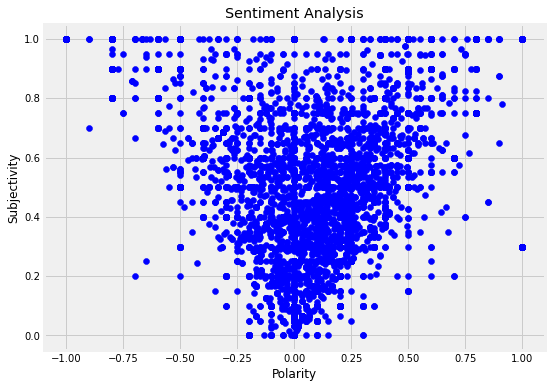

In [7]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, data.shape[0]):
    plt.scatter(data["Polarity"][i], data["Subjectivity"][i], color='Blue') 

# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [6]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1

data['Analysis'] = data['Polarity'].apply(getAnalysis)

# Show the dataframe
data

,Tweets,Subjectivity,Polarity,Analysis
0,have total production exports hence scare shor...,0.425000,0.000000,0
1,WuhanVirus China must BanChina,0.000000,0.000000,0
2,pang fucking joke HKIndependence freehk banchi...,0.800000,-0.600000,-1
3,BanChina phones plus phones sold minutes when ...,0.000000,0.000000,0
4,China enemy privacy China shows what totalitar...,0.000000,0.000000,0
...,...,...,...,...
11727,tiktokban literally saying tiktok good live re...,0.466667,0.345455,1
11728,Trump desire eliminate TikTok related China Ti...,0.700000,0.150000,1
11729,CCPChina whole world miscalculating their resp...,0.613333,-0.093333,-1
11730,Happy women month every woman there regardless...,0.800000,0.650000,1


#### Feature Value Count

In [7]:
# Show the value counts
data['Analysis'].value_counts()

 0    5938
 1    4018
-1    1776
Name: Analysis, dtype: int64

#### Bar Plot Sentiments vs Value Count

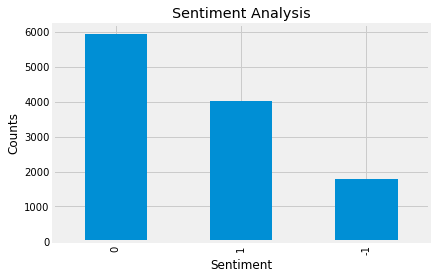

In [8]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

## Data Modelling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

#splitting test and train dataset
x_train,x_test,y_train,y_test = train_test_split(data['Tweets'],data['Analysis'],test_size=0.2)
vector = CountVectorizer()
counts = vector.fit_transform(x_train)

In [10]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

score = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

def evaluateModel(modelClassifier, modelName):
    #evaluating the model
    counts_test=vector.transform(x_test)
    prediction=modelClassifier.predict(counts_test)
    a = accuracy_score(y_test,prediction)
    p = precision_score(y_test,prediction, average='micro')
    r = recall_score(y_test,prediction, average='micro')
    f = f1_score(y_test,prediction, average='weighted')
    df = pd.DataFrame([[modelName, a, p, r, f]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    global score
    score = score.append(df, ignore_index=True)
    print(pd.crosstab(y_test, prediction))

### Naive Bayes Classification
#### before balancing

In [11]:
from sklearn.naive_bayes import MultinomialNB

NBClassifier=MultinomialNB()
NBClassifier.fit(counts,y_train)
evaluateModel(NBClassifier, 'Naive Bayes Classification - before balancing')
score

col_0      -1     0    1
Analysis                
-1        125    94  137
 0         10  1060  109
 1         13    81  718


,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes Classification - before balancing,0.810822,0.810822,0.810822,0.796143


#### after balancing

In [12]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = data[data.Analysis==0]
df_minority_negative = data[data.Analysis==-1]
df_minority_positive = data[data.Analysis==1]
 
# Upsample minority class
df_minority_upsampled_negative = resample(df_minority_negative, 
                                 replace=True,     # sample with replacement
                                 n_samples=5938) 

df_minority_upsampled_positive = resample(df_minority_positive, 
                                 replace=True,     # sample with replacement
                                 n_samples=5938)
# Combine majority class with upsampled minority class
new_data=pd.concat([df_majority,df_minority_upsampled_negative,df_minority_upsampled_positive])
# Show the value counts
new_data['Analysis'].value_counts()

-1    5938
 1    5938
 0    5938
Name: Analysis, dtype: int64

In [13]:
x_train,x_test,y_train,y_test=train_test_split(new_data['Tweets'],new_data['Analysis'],test_size=0.2)
vector=CountVectorizer()
counts=vector.fit_transform(x_train)
NBClassifier=MultinomialNB()
NBClassifier.fit(counts,y_train)
evaluateModel(NBClassifier, 'Naive Bayes Classification - after balancing')
score

col_0       -1    0     1
Analysis                 
-1        1087   27    50
 0         150  839   167
 1          71   30  1142


,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes Classification - before balancing,0.810822,0.810822,0.810822,0.796143
1,Naive Bayes Classification - after balancing,0.861072,0.861072,0.861072,0.858848


#### removing neutral class

In [14]:
data = data[data.Analysis!=0]
data

,Tweets,Subjectivity,Polarity,Analysis
2,pang fucking joke HKIndependence freehk banchi...,0.800000,-0.600000,-1
5,Xitler wants this video banned BanChina,0.100000,0.200000,1
6,national security clearly shown kills freedom ...,0.383333,0.100000,1
9,think missing huge opportunity India banchina ...,0.475000,0.100000,1
10,That correct first step should identify called...,0.583333,0.291667,1
...,...,...,...,...
11727,tiktokban literally saying tiktok good live re...,0.466667,0.345455,1
11728,Trump desire eliminate TikTok related China Ti...,0.700000,0.150000,1
11729,CCPChina whole world miscalculating their resp...,0.613333,-0.093333,-1
11730,Happy women month every woman there regardless...,0.800000,0.650000,1


In [15]:
# Separate majority and minority classes
df_majority = data[data.Analysis==0]
df_minority_negative = data[data.Analysis==-1]
df_minority_positive = data[data.Analysis==1]
 
# Upsample minority class
df_minority_upsampled_negative = resample(df_minority_negative, 
                                 replace=True,     # sample with replacement
                                 n_samples=4018) 

df_minority_upsampled_positive = resample(df_minority_positive, 
                                 replace=True,     # sample with replacement
                                 n_samples=4018)

# Combine majority class with upsampled minority class
new_data=pd.concat([df_majority,df_minority_upsampled_negative,df_minority_upsampled_positive])
# Display new class counts
new_data.Analysis.value_counts()

-1    4018
 1    4018
Name: Analysis, dtype: int64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(new_data['Tweets'],new_data['Analysis'],test_size=0.2)
vector=CountVectorizer()
counts=vector.fit_transform(x_train)
NBClassifier=MultinomialNB()
NBClassifier.fit(counts,y_train)
evaluateModel(NBClassifier, 'Naive Bayes Classification - removed neutral')
score

col_0      -1    1
Analysis          
-1        763   47
 1         65  733


,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes Classification - before balancing,0.810822,0.810822,0.810822,0.796143
1,Naive Bayes Classification - after balancing,0.861072,0.861072,0.861072,0.858848
2,Naive Bayes Classification - removed neutral,0.930348,0.930348,0.930348,0.930334


### Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

#creat decision tree classifier object
DTClassifier=DecisionTreeClassifier()
#train decision tree classifier
DTClassifier=DTClassifier.fit(counts,y_train)
evaluateModel(DTClassifier, 'Decision Tree Classifier')
score

col_0      -1    1
Analysis          
-1        788   22
 1         47  751


,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes Classification - before balancing,0.810822,0.810822,0.810822,0.796143
1,Naive Bayes Classification - after balancing,0.861072,0.861072,0.861072,0.858848
2,Naive Bayes Classification - removed neutral,0.930348,0.930348,0.930348,0.930334
3,Decision Tree Classifier,0.957090,0.957090,0.957090,0.957074


### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

RFClasssifier = RandomForestClassifier(n_estimators=100)
RFClasssifier.fit(counts, y_train)
evaluateModel(RFClasssifier, 'Random Forest Classifier')
score

col_0      -1    1
Analysis          
-1        783   27
 1         42  756


,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes Classification - before balancing,0.810822,0.810822,0.810822,0.796143
1,Naive Bayes Classification - after balancing,0.861072,0.861072,0.861072,0.858848
2,Naive Bayes Classification - removed neutral,0.930348,0.930348,0.930348,0.930334
3,Decision Tree Classifier,0.957090,0.957090,0.957090,0.957074
4,Random Forest Classifier,0.957090,0.957090,0.957090,0.957083


### Support Vector Machine

In [19]:
from sklearn import svm

#Create a svm Classifier
SVMClassifier = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
SVMClassifier.fit(counts, y_train)
evaluateModel(SVMClassifier, 'Support Vector Machine')
score

col_0      -1    1
Analysis          
-1        785   25
 1         30  768


,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes Classification - before balancing,0.810822,0.810822,0.810822,0.796143
1,Naive Bayes Classification - after balancing,0.861072,0.861072,0.861072,0.858848
2,Naive Bayes Classification - removed neutral,0.930348,0.930348,0.930348,0.930334
3,Decision Tree Classifier,0.957090,0.957090,0.957090,0.957074
4,Random Forest Classifier,0.957090,0.957090,0.957090,0.957083
5,Support Vector Machine,0.965796,0.965796,0.965796,0.965795
